         Age         Income  Spending_Score
0  37.476086   82413.322846       11.209263
1  67.437144   23834.696324       90.352738
2  56.063685   31971.014980       51.019985
3  49.130241  109348.189795       82.819289
4  26.112969   78675.051264       32.684911
Training SOM...


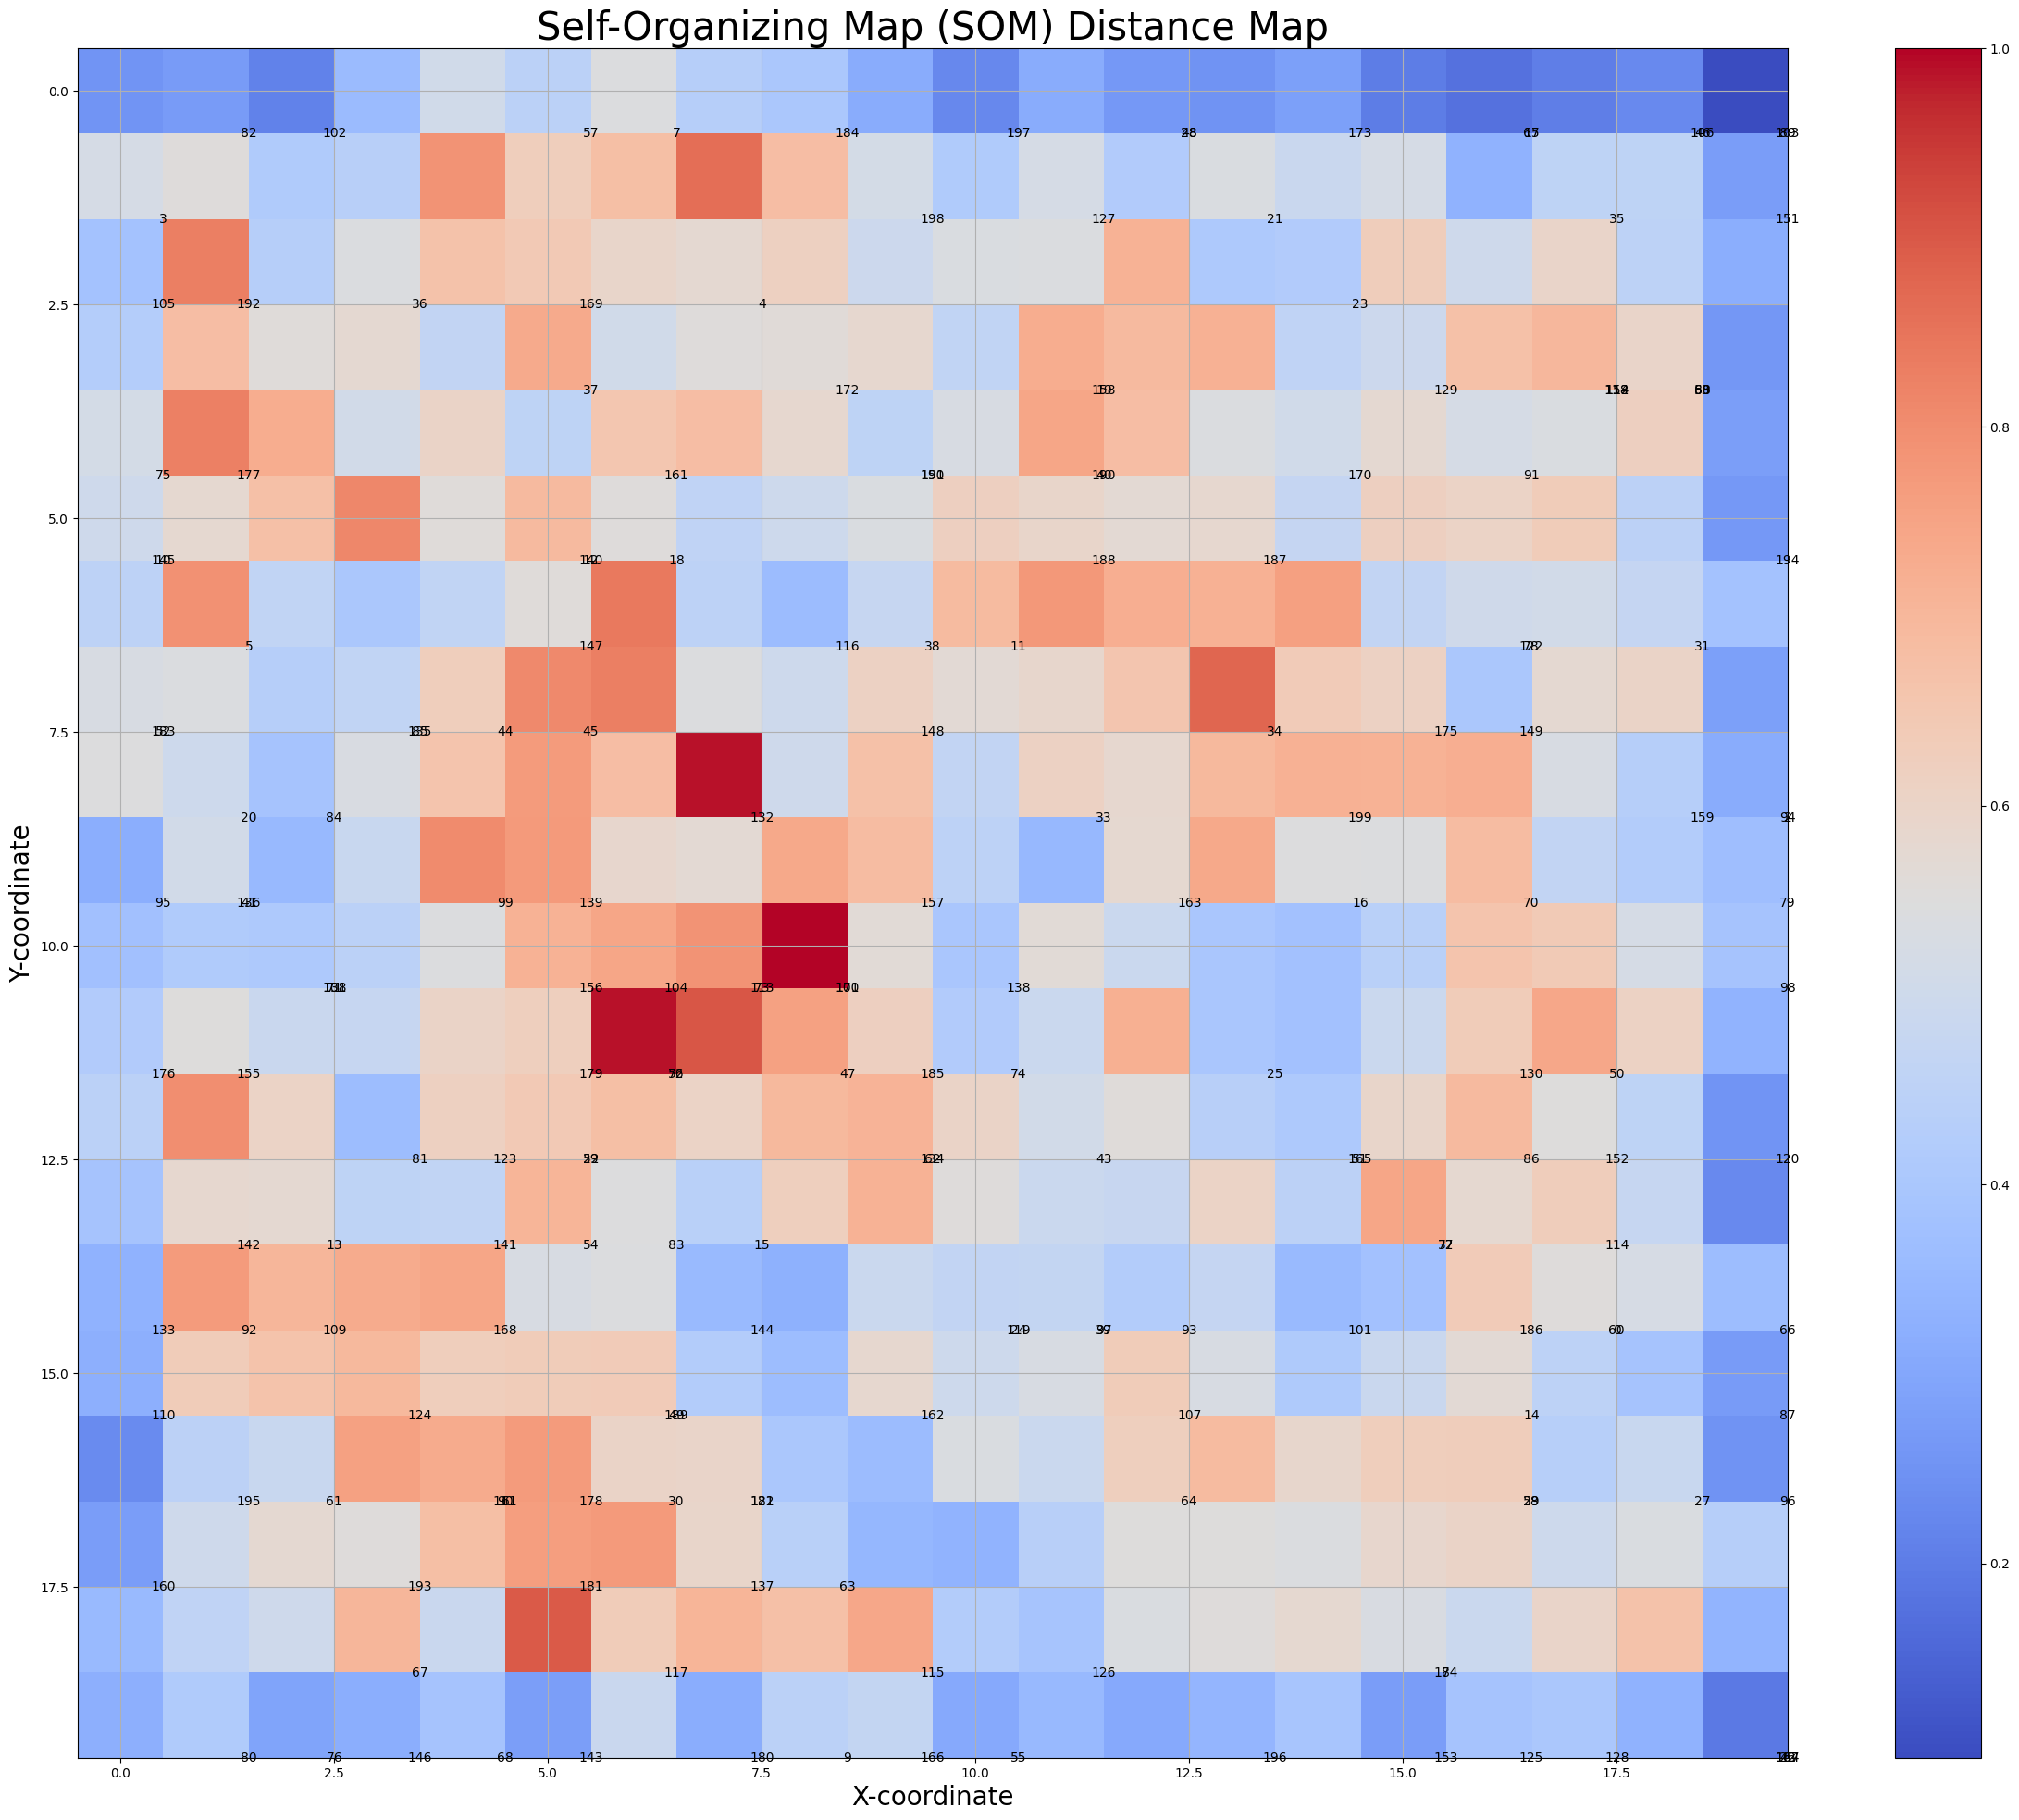

In [6]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (adjust the path if needed)
data = pd.read_csv('customer_data.csv')

print(data.head())

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

som_grid_x = 20 
som_grid_y = 20  
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

som.random_weights_init(data_scaled)

print("Training SOM...")
som.train_random(data_scaled, num_iteration=200)

plt.figure(figsize=(30, 24))  

plt.imshow(som.distance_map().T, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Self-Organizing Map (SOM) Distance Map", fontsize=30)

for i, x in enumerate(data_scaled):
    winner = som.winner(x)  # Find the winning neuron for each data point
    plt.text(
        winner[0] + 0.5, winner[1] + 0.5,
        str(i),
        color="black", fontsize=10, ha='center', va='center'
    )

# Plot settings
plt.xlabel("X-coordinate", fontsize=20)
plt.ylabel("Y-coordinate", fontsize=20)
plt.grid(True)
plt.show()
